In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [3]:
sns.reset_defaults()

if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
"""
1. 시각적으로 표현할 분석 소주제 5개이상 선정
2. 전처리(결측/이상/중복) 모두 처리 진행
    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
3. 주제별 시각화 그래프 2개 이상
----------------------------------------------------------
4. 주제별 분석내용 작성 : 개인별로 작성
5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일
    - 제출형식 : 모두 압축해서 : 본인이름.zip
    - 제출위치 : 구글드라이브 > 3_산출물 > 1_심평원분석
6. 문제해결 : 조별로 스터디 하면서 해결    
"""

'\n1. 시각적으로 표현할 분석 소주제 5개이상 선정\n2. 전처리(결측/이상/중복) 모두 처리 진행\n    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인\n3. 주제별 시각화 그래프 2개 이상\n----------------------------------------------------------\n4. 주제별 분석내용 작성 : 개인별로 작성\n5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일\n    - 제출형식 : 모두 압축해서 : 본인이름.zip\n    - 제출위치 : 구글드라이브 > 3_산출물 > 1_심평원분석\n6. 문제해결 : 조별로 스터디 하면서 해결    \n'

### 성별 진료과목 분석

In [4]:
df_20 = pd.read_excel('./data/day6/files_new2/df_kor_20table_명세서일반내역.xlsx')

In [5]:
df_sub = pd.read_excel('./data/day6/files/표본자료 변수 테이블(2012-2013).xlsx', 
                                sheet_name='표1.표2.표3.표4.',
                                skiprows=2,skipfooter=33,usecols='B:C')
df_sub['진료과목코드'] = df_sub['DGSBJT_CD']
df_sub['진료과목'] = df_sub['Unnamed: 2']
df_sub = df_sub.drop(columns=['DGSBJT_CD'])
df_sub = df_sub.drop(columns=['Unnamed: 2'])
df_sub

,진료과목코드,진료과목
0,0,일반의
1,1,내과
2,2,신경과
3,3,정신과
4,4,외과
5,5,정형외과
6,6,신경외과
7,7,흉부외과
8,8,성형외과
9,9,마취통증의학과


In [7]:
df_gen = df_20[['성별구분코드','진료과목코드']]
df_gen

,성별구분코드,진료과목코드
0,1,1
1,2,0
2,1,3
3,1,54
4,1,1
...,...,...
5626,2,56
5627,1,1
5628,1,11
5629,2,5


In [8]:
df_merge = pd.merge(df_gen,df_sub)
df_merge

,성별구분코드,진료과목코드,진료과목
0,1,1,내과
1,1,1,내과
2,1,1,내과
3,2,1,내과
4,1,1,내과
...,...,...,...
5626,2,16,영상의학과
5627,2,16,영상의학과
5628,1,16,영상의학과
5629,2,16,영상의학과


In [9]:
df_m = df_merge[df_merge['성별구분코드'] == 1]
df_f = df_merge[df_merge['성별구분코드'] == 2]
df_m['성별'] = '남성'
df_f['성별'] = '여성'
df_gen_sub = pd.concat([df_m,df_f])
df_gen_sub

C:\Users\admin\AppData\Local\Temp\ipykernel_6700\1949962952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['성별'] = '남성'
C:\Users\admin\AppData\Local\Temp\ipykernel_6700\1949962952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['성별'] = '여성'


,성별구분코드,진료과목코드,진료과목,성별
0,1,1,내과,남성
1,1,1,내과,남성
2,1,1,내과,남성
4,1,1,내과,남성
8,1,1,내과,남성
...,...,...,...,...
5623,2,51,치과보철과,여성
5626,2,16,영상의학과,여성
5627,2,16,영상의학과,여성
5629,2,16,영상의학과,여성


In [10]:
df_gen_sub.info()
df_gen_sub.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5631 entries, 0 to 5630
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별구분코드  5631 non-null   int64 
 1   진료과목코드  5631 non-null   int64 
 2   진료과목    5631 non-null   object
 3   성별      5631 non-null   object
dtypes: int64(2), object(2)
memory usage: 220.0+ KB


,성별구분코드,진료과목코드
count,5631.000000,5631.000000
mean,1.491387,10.157698
std,0.499970,13.380986
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,5.000000
75%,2.000000,13.000000
max,2.000000,56.000000


In [13]:
df_final = df_gen_sub.groupby(['진료과목','성별']).count().reset_index()[["진료과목", "성별", "성별구분코드"]]

<Figure size 2000x1000 with 0 Axes>

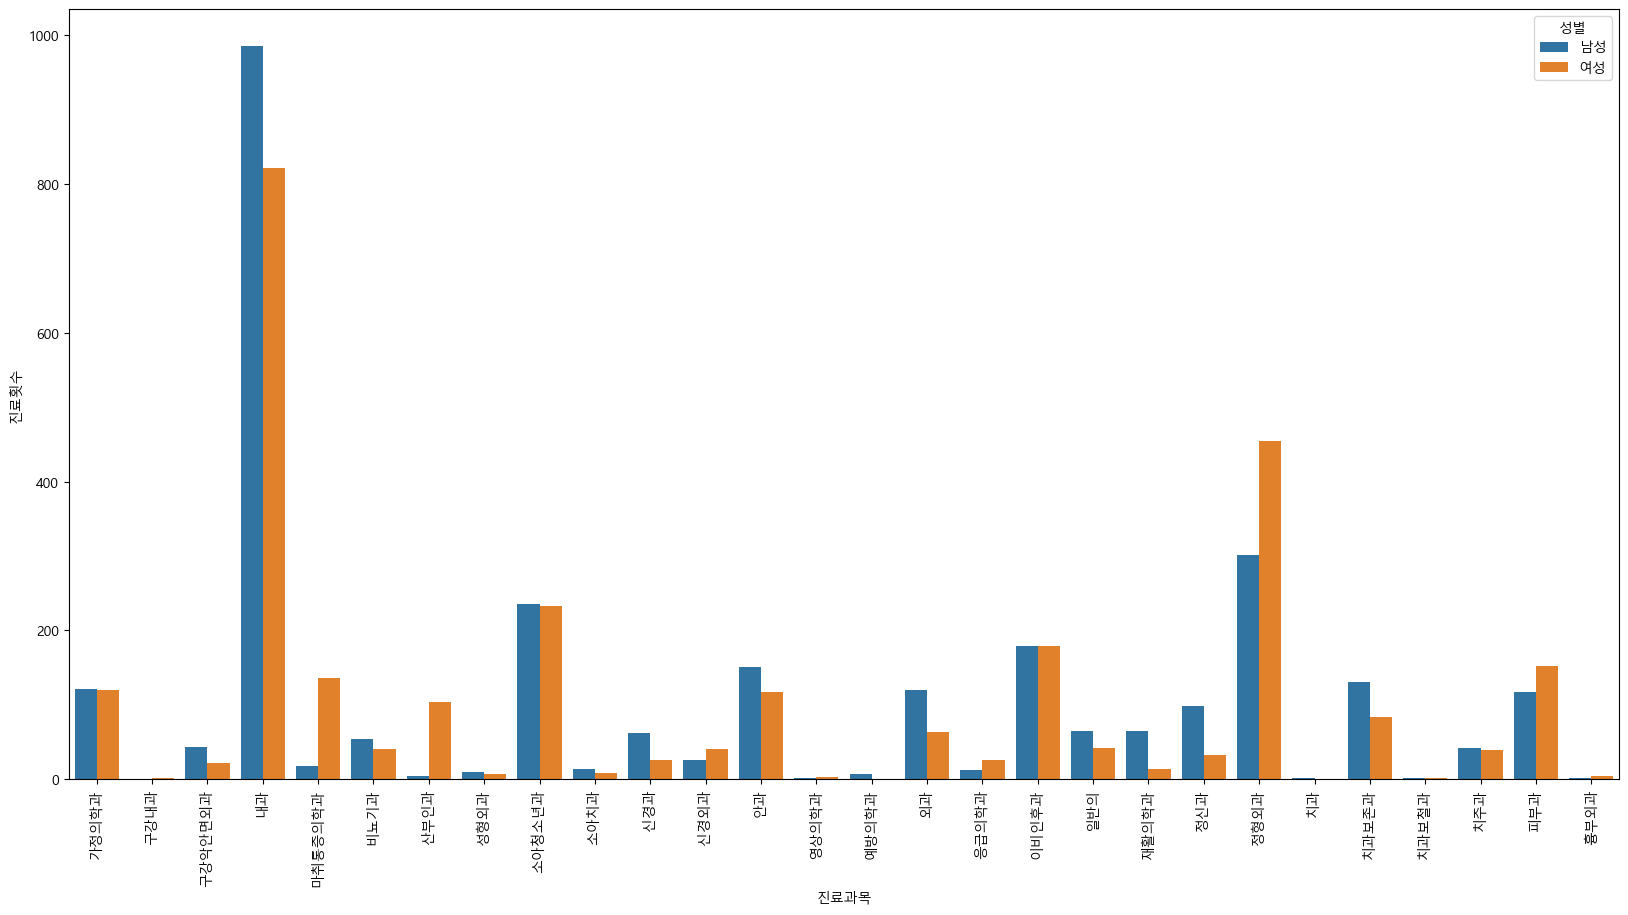

In [14]:
plt.figure(figsize=(20,10))

sns.barplot(x='진료과목',y='성별구분코드',hue='성별',data =df_final)
plt.xticks(rotation = 90)
plt.ylabel('진료횟수')
plt.show()

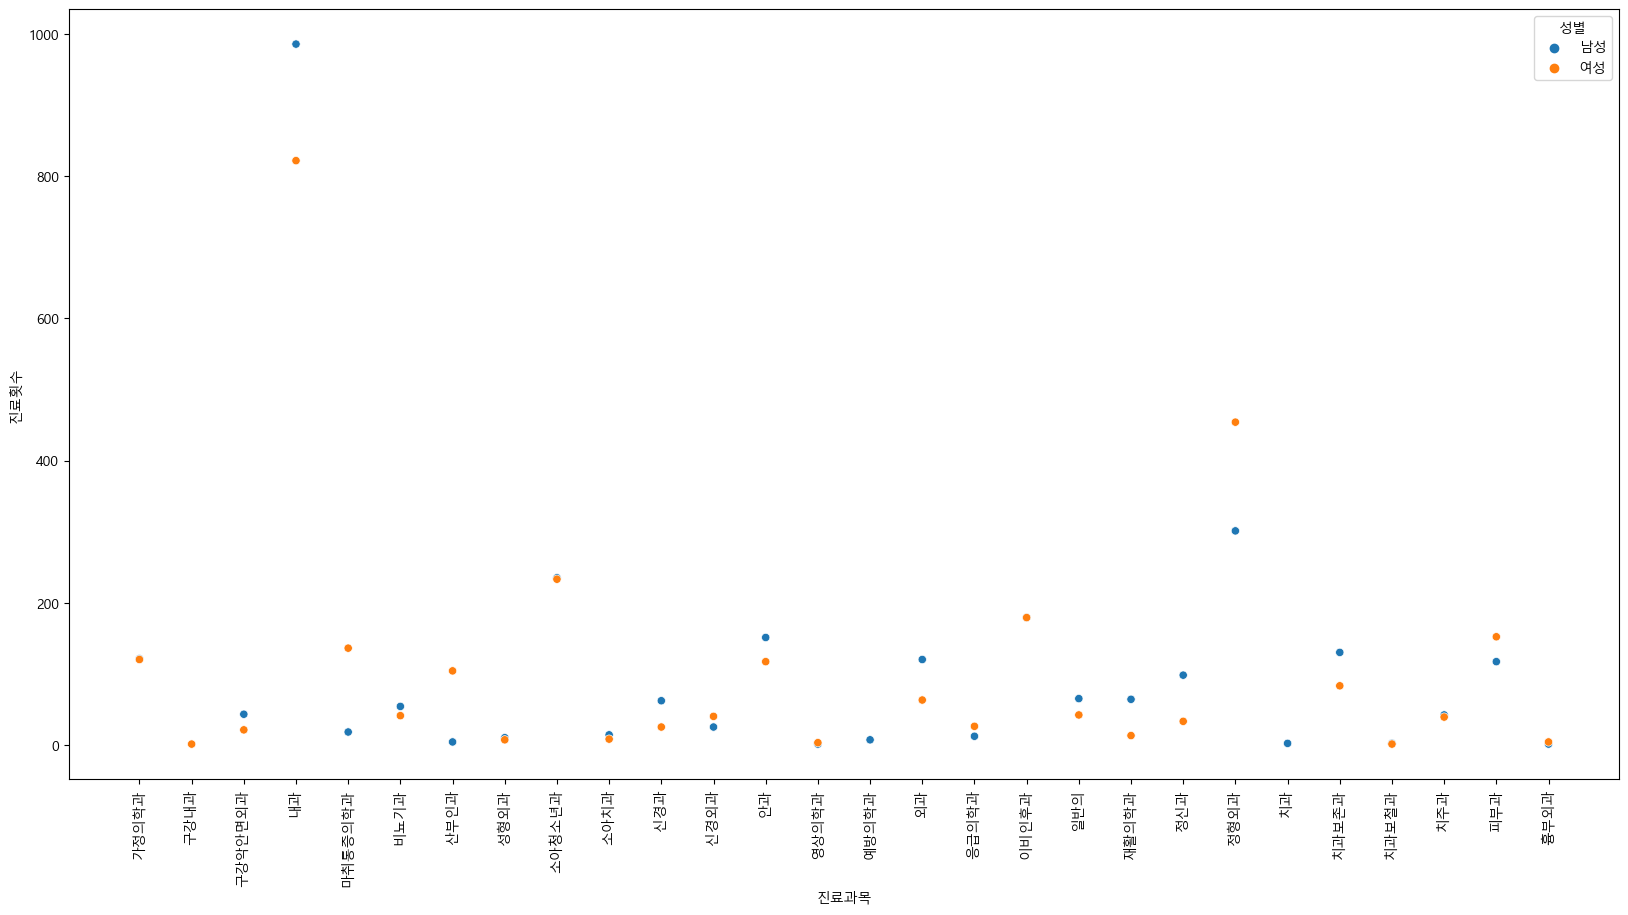

In [15]:
plt.figure(figsize=(20,10))

sns.scatterplot(x='진료과목',y='성별구분코드',hue='성별',data =df_final)
plt.xticks(rotation = 90)
plt.ylabel('진료횟수')
plt.show()

In [16]:
df_final.to_excel('./data/성별_진료과목별_진료횟수.xlsx')